# Text Generation

In this example we will train a model using the poem "The Raven", by Edgar Allan Poe.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data="Once upon a midnight dreary, while I pondered, weak and weary, \n Over many a quaint and curious volume of forgotten lore— \nWhile I nodded, nearly napping, suddenly there came a tapping, \n As of some one gently rapping, rapping at my chamber door. \nTis some visitor, I muttered, tapping at my chamber door— \nOnly this and nothing more. \nAh, distinctly I remember it was in the bleak December; \nAnd each separate dying ember wrought its ghost upon the floor. \nEagerly I wished the morrow;—vainly I had sought to borrow \nFrom my books surcease of sorrow—sorrow for the lost Lenore— \nFor the rare and radiant maiden whom the angels name Lenore—\nNameless here for evermore. \nAnd the silken, sad, uncertain rustling of each purple curtain\nThrilled me—filled me with fantastic terrors never felt before;\n    So that now, to still the beating of my heart, I stood repeating\n    ’Tis some visitor entreating entrance at my chamber door—\nSome late visitor entreating entrance at my chamber door;—\n            This it is and nothing more.\n    Presently my soul grew stronger; hesitating then no longer,\nSir, said I, or Madam, truly your forgiveness I implore;\n   But the fact is I was napping, and so gently you came rapping,\n   And so faintly you came tapping, tapping at my chamber door,\nThat I scarce was sure I heard you—here I opened wide the door;—\n            Darkness there and nothing more.\n    Deep into that darkness peering, long I stood there wondering, fearing,\nDoubting, dreaming dreams no mortal ever dared to dream before;\n    But the silence was unbroken, and the stillness gave no token,\n    And the only word there spoken was the whispered word, Lenore?\nThis I whispered, and an echo murmured back the word, Lenore!—\n           Merely this and nothing more.\n    Back into the chamber turning, all my soul within me burning,\nSoon again I heard a tapping somewhat louder than before.\n    Surely, said I, surely that is something at my window lattice;\n     Let me see, then, what thereat is, and this mystery explore—\nLet my heart be still a moment and this mystery explore;—\n            ’Tis the wind and nothing more!\n    Open here I flung the shutter, when, with many a flirt and flutter,\nIn there stepped a stately Raven of the saintly days of yore;\n    Not the least obeisance made he; not a minute stopped or stayed he;\n    But, with mien of lord or lady, perched above my chamber door—\nPerched upon a bust of Pallas just above my chamber door—\n            Perched, and sat, and nothing more.\nThen this ebony bird beguiling my sad fancy into smiling,\nBy the grave and stern decorum of the countenance it wore,\nThough thy crest be shorn and shaven, thou, I said, art sure no craven,\nGhastly grim and ancient Raven wandering from the Nightly shore—\nTell me what thy lordly name is on the Night’s Plutonian shore!\n            Quoth the Raven Nevermore.\n    Much I marvelled this ungainly fowl to hear discourse so plainly,\nThough its answer little meaning—little relevancy bore;\n   For we cannot help agreeing that no living human being\n    Ever yet was blessed with seeing bird above his chamber door—\nBird or beast upon the sculptured bust above his chamber door,\n            With such name as Nevermore.\n    But the Raven, sitting lonely on the placid bust, spoke only\nThat one word, as if his soul in that one word he did outpour.\n    Nothing farther then he uttered—not a feather then he fluttered—\n    Till I scarcely more than muttered Other friends have flown before—\nOn the morrow he will leave me, as my Hopes have flown before.\n            Then the bird said Nevermore.\n    Startled at the stillness broken by reply so aptly spoken,\nDoubtless, said I, what it utters is its only stock and store\n    Caught from some unhappy master whom unmerciful Disaster\n    Followed fast and followed faster till his songs one burden bore—\nTill the dirges of his Hope that melancholy burden bore\n           Of ‘Never—nevermore’.\n    But the Raven still beguiling all my fancy into smiling,\nStraight I wheeled a cushioned seat in front of bird, and bust and door;\n    Then, upon the velvet sinking, I betook myself to linking\n    Fancy unto fancy, thinking what this ominous bird of yore—\nWhat this grim, ungainly, ghastly, gaunt, and ominous bird of yore\n            Meant in croaking Nevermore.\n   This I sat engaged in guessing, but no syllable expressing\nTo the fowl whose fiery eyes now burned into my bosom’s core;\n    This and more I sat divining, with my head at ease reclining\n    On the cushion’s velvet lining that the lamp-light gloated o’er,\nBut whose velvet-violet lining with the lamp-light gloating o’er,\n           She shall press, ah, nevermore!\n    Then, methought, the air grew denser, perfumed from an unseen censer\nSwung by Seraphim whose foot-falls tinkled on the tufted floor.\n    Wretch, I cried, thy God hath lent thee—by these angels he hath sent thee\n   Respite—respite and nepenthe from thy memories of Lenore;\nQuaff, oh quaff this kind nepenthe and forget this lost Lenore!\n           Quoth the Raven Nevermore.\n    Prophet! said I, thing of evil!—prophet still, if bird or devil!—\nWhether Tempter sent, or whether tempest tossed thee here ashore,\n   Desolate yet all undaunted, on this desert land enchanted—\n   On this home by Horror haunted—tell me truly, I implore—\nIs there—is there balm in Gilead?—tell me—tell me, I implore!\n            Quoth the Raven Nevermore.\n    Prophet! said I, thing of evil!—prophet still, if bird or devil!\nBy that Heaven that bends above us—by that God we both adore—\n    Tell this soul with sorrow laden if, within the distant Aidenn,\n    It shall clasp a sainted maiden whom the angels name Lenore—\nClasp a rare and radiant maiden whom the angels name Lenore.\n           Quoth the Raven Nevermore.\n   Be that word our sign of parting, bird or fiend! I shrieked, upstarting—\nGet thee back into the tempest and the Night’s Plutonian shore!\n    Leave no black plume as a token of that lie thy soul hath spoken!\n    Leave my loneliness unbroken!—quit the bust above my door!\nTake thy beak from out my heart, and take thy form from off my door!\n            Quoth the Raven Nevermore.\n    And the Raven, never flitting, still is sitting, still is sitting\nOn the pallid bust of Pallas just above my chamber door;\n    And his eyes have all the seeming of a demon’s that is dreaming,\n    And the lamp-light o’er him streaming throws his shadow on the floor;\nAnd my soul from out that shadow that lies floating on the floor\n            Shall be lifted—nevermore!\n"

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'my': 4, 'of': 5, 'this': 6, 'that': 7, 'a': 8, 'chamber': 9, 'is': 10, 'raven': 11, 'bird': 12, 'on': 13, 'door': 14, 'nevermore': 15, 'at': 16, 'more': 17, 'from': 18, 'with': 19, 'then': 20, 'or': 21, 'nothing': 22, 'in': 23, 'me': 24, 'still': 25, 'no': 26, 'said': 27, 'but': 28, 'he': 29, 'above': 30, 'thy': 31, 'his': 32, 'there': 33, 'was': 34, 'to': 35, 'soul': 36, 'into': 37, 'word': 38, 'bust': 39, 'upon': 40, 'tapping': 41, 'as': 42, 'some': 43, 'door—': 44, 'it': 45, 'name': 46, 'so': 47, '—': 48, 'lenore': 49, 'what': 50, 'by': 51, 'quoth': 52, 'one': 53, 'only': 54, 'floor': 55, 'for': 56, 'whom': 57, 'angels': 58, 'before': 59, 'all': 60, 'be': 61, 'fancy': 62, 'if': 63, 'came': 64, 'rapping': 65, 'visitor': 66, 'its': 67, 'lenore—': 68, 'maiden': 69, 'here': 70, 'heart': 71, 'spoken': 72, 'back': 73, 'perched': 74, 'sat': 75, 'sitting': 76, 'till': 77, 'have': 78, 'leave': 79, 'velvet': 80, 'whose': 81, 'lamp': 82, 'light': 83, 'o’er': 84, '

# Create Training Data

This will split the input text into input sequences. It does it by breaking it into n-grams.


In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# created categorigal on-hot encoding labels
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['once'])
print(tokenizer.word_index['upon'])
print(tokenizer.word_index['a'])
print(tokenizer.word_index['midnight'])
print(tokenizer.word_index['dreary'])

164
40
8
165
166


In [ ]:
print(xs[6])

[  0   0   0   0   0   0   0 164  40   8 165 166  88   3]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(f'Input: {input_sequences[5]}')
print(f'xs:    {xs[5]}')
print(f'label: {labels[5]}')
print(f'ys:\n{ys[5]}')

Input: [  0   0   0   0   0   0   0   0 164  40   8 165 166  88   3]
xs:    [  0   0   0   0   0   0   0   0 164  40   8 165 166  88]
label: 3
ys:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'my': 4, 'of': 5, 'this': 6, 'that': 7, 'a': 8, 'chamber': 9, 'is': 10, 'raven': 11, 'bird': 12, 'on': 13, 'door': 14, 'nevermore': 15, 'at': 16, 'more': 17, 'from': 18, 'with': 19, 'then': 20, 'or': 21, 'nothing': 22, 'in': 23, 'me': 24, 'still': 25, 'no': 26, 'said': 27, 'but': 28, 'he': 29, 'above': 30, 'thy': 31, 'his': 32, 'there': 33, 'was': 34, 'to': 35, 'soul': 36, 'into': 37, 'word': 38, 'bust': 39, 'upon': 40, 'tapping': 41, 'as': 42, 'some': 43, 'door—': 44, 'it': 45, 'name': 46, 'so': 47, '—': 48, 'lenore': 49, 'what': 50, 'by': 51, 'quoth': 52, 'one': 53, 'only': 54, 'floor': 55, 'for': 56, 'whom': 57, 'angels': 58, 'before': 59, 'all': 60, 'be': 61, 'fancy': 62, 'if': 63, 'came': 64, 'rapping': 65, 'visitor': 66, 'its': 67, 'lenore—': 68, 'maiden': 69, 'here': 70, 'heart': 71, 'spoken': 72, 'back': 73, 'perched': 74, 'sat': 75, 'sitting': 76, 'till': 77, 'have': 78, 'leave': 79, 'velvet': 80, 'whose': 81, 'lamp': 82, 'light': 83, 'o’er': 84, '

# Training the Model

In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
31/31 [==============================] - 0s 7ms/step - loss: 6.1110 - accuracy: 0.0277
Epoch 2/500
31/31 [==============================] - 0s 7ms/step - loss: 5.8881 - accuracy: 0.0308
Epoch 3/500
31/31 [==============================] - 0s 7ms/step - loss: 5.5630 - accuracy: 0.0575
Epoch 4/500
31/31 [==============================] - 0s 7ms/step - loss: 5.4903 - accuracy: 0.0575
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 5.4546 - accuracy: 0.0575
Epoch 6/500
31/31 [==============================] - 0s 7ms/step - loss: 5.4134 - accuracy: 0.0575
Epoch 7/500
31/31 [==============================] - 0s 7ms/step - loss: 5.3639 - accuracy: 0.0575
Epoch 8/500
31/31 [==============================] - 0s 7ms/step - loss: 5.2942 - accuracy: 0.0575
Epoch 9/500
31/31 [==============================] - 0s 7ms/step - loss: 5.2226 - accuracy: 0.0575
Epoch 10/500
31/31 [==============================] - 0s 6ms/step - loss: 5.1511 - accuracy: 0.0616
Epoch 11/

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

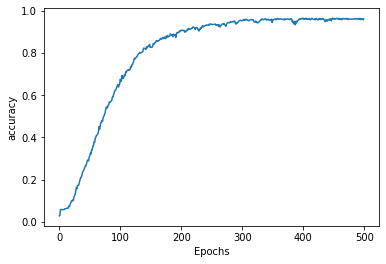

In [ ]:
plot_graphs(history, 'accuracy')


# Predict next words

Now the following function uses the trained model to predict the following word taking as seed the previous ones.

In [ ]:
seed_text = "Quoth the raven"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Quoth the raven nevermore nevermore beguiling all the tempest my sad hath sent thee door yore — yore — — violet —tell devil


# Experiment:

Try running the previous cell with a higher number of next_words. What happens?

This problem is caused due to our lack of a big training dataset. Remember, we are training our model with only one poem. That is far from being enough.

One way to solve that would be using a much bigger dataset.